In [14]:
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.utils import shuffle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-20m.zip
!unzip -n ml-20m.zip
!ls

File ‘ml-20m.zip’ already there; not retrieving.

Archive:  ml-20m.zip
ml-20m	ml-20m.zip  sample_data


In [16]:
df = pd.read_csv('ml-20m/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


In [18]:
df['userId'] = pd.Categorical(df['userId'])
df['new_user_id'] = df['userId'].cat.codes

df['movieId'] = pd.Categorical(df['movieId'])
df['new_movie_id'] = df['movieId'].cat.codes

user_ids = df['new_user_id'].values
movie_ids = df['new_movie_id'].values
ratings = df['rating'].values

df.head()

,userId,movieId,rating,timestamp,new_user_id,new_movie_id
0,1,2,3.5,1112486027,0,1
1,1,29,3.5,1112484676,0,28
2,1,32,3.5,1112484819,0,31
3,1,47,3.5,1112484727,0,46
4,1,50,3.5,1112484580,0,49


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 6 columns):
 #   Column        Dtype   
---  ------        -----   
 0   userId        category
 1   movieId       category
 2   rating        float64 
 3   timestamp     int64   
 4   new_user_id   int32   
 5   new_movie_id  int16   
dtypes: category(2), float64(1), int16(1), int32(1), int64(1)
memory usage: 541.6 MB


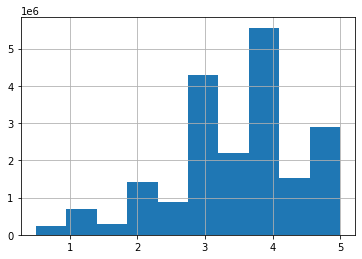

In [20]:
df['rating'].hist()

In [24]:
print(f'Unique users: {len(df["new_user_id"].unique())}')
print(f'Unique movies: {len(df["new_movie_id"].unique())}')

Unique users: 138493
Unique movies: 26744


In [ ]:
user_ids, movie_ids, ratings = shuffle(user_ids, movie_ids, ratings)

idx_train = int(len(user_ids) * 0.8)
U_train, M_train, R_train = user_ids[:idx_train], movie_ids[:idx_train], ratings[:idx_train]
U_test, M_test, R_test = user_ids[idx_train:], movie_ids[idx_train:], ratings[idx_train:]

print('user_ids shape:', user_ids.shape)
print('U_train shape:', U_train.shape)
print('U_test shape:', U_test.shape)

user_ids shape: (20000263,)
U_train shape: (16000210,)
U_test shape: (4000053,)


In [ ]:
print('len(user_ids):', len(user_ids))
print('len(movie_ids):', len(movie_ids))

len(user_ids): 20000263
len(movie_ids): 20000263


In [ ]:
USER_EMBEDDING_DIM = 10
MOVIE_EMBEDDING_DIM = 10

ui = Input((1,))
ux = Embedding(len(user_ids), USER_EMBEDDING_DIM)(ui)
ux = Flatten()(ux)

mi = Input((1,))
mx = Embedding(len(movie_ids), MOVIE_EMBEDDING_DIM)(mi)
mx = Flatten()(mx)

x = Concatenate()([ux, mx])
x = Dense(1024, activation='relu')(x)
x = Dense(1)(x)

model = Model(inputs=[ui, mi], outputs=x)
model.compile(loss='mse', optimizer=SGD(learning_rate=0.08, momentum=0.9))

model.summary()

history = model.fit([U_train, M_train], R_train, validation_data=([U_test, M_test], R_test), epochs=10, batch_size=1024, verbose=2)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 10)        200002630   ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 10)        200002630   ['input_2[0][0]']                
                                                                                              

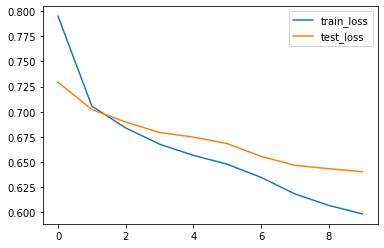

In [ ]:
plt.plot(history.history['loss'], label='train_loss');
plt.plot(history.history['val_loss'], label='test_loss');
plt.legend();

In [ ]:
# is this on par with other approaches?
# https://datascience.stackexchange.com/questions/29740/benchmark-result-for-movielens-dataset
np.sqrt(0.6259)

0.7911384202527394